## Flight Price Prediction

##### Steps-
1.	Problem Statement
2.	Select Data set.
3.	Import
4.	EDA
5.	Missing values Treatment
6.	Visualization 
7.	Outlier Treatment
8.	Feature Engineering
9.	Modeling
10.	Accuracy
11.	Validate our model
12.	Confusion matrix 
13.	Reduce type 2 error


### 1. Problem Statement

In this Excersice I am going to predict the fare/Price of the Flight ticket based on some factor. So, here price is my Target Variable/Dependent Variables/Outcome Variables/Output Variables and the others are Independent variables/input variables/predictors/features.

### 2. Importing Libraries

In [1]:
# Code to ignore all the unwantwd warning 
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

### 3. Reading Dataset

In [3]:
train = pd.read_excel('data_Train.xlsx',engine='openpyxl')
test = pd.read_excel('Test_set.xlsx',engine='openpyxl')

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
# Printing Shape of the train and test data

print(train.shape)
print(test.shape)

(10683, 11)
(2671, 10)


So, from these above result I can say that there is a difference in number of columns and that is "Price" column which is missing in test dataset. This is the Target variable I've to predict. 

### 4. EDA (Exploratory Data Analysis)

In [7]:
train.shape

(10683, 11)

In [8]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Here Total_Stops and Route column has 10682 entries which is lesser than other.

In [10]:
train.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [11]:
## Return a Series containing counts of unique values
train["Duration"].value_counts().head(50)

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
2h 15m     135
1h 25m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
11h         62
11h 45m     62
5h 15m      62
1h 20m      61
14h 25m     61
6h 35m      60
22h 55m     57
12h 10m     57
10h 30m     57
12h 45m     56
5h 45m      54
16h 5m      53
12h 30m     52
7h 20m      52
11h 30m     52
15h 10m     51
4h 55m      51
10h 15m     50
8h 25m      50
10h 25m     49
10h         49
12h         49
12h 15m     48
Name: Duration, dtype: int64

In [12]:
## Return a Series containing counts of unique values
train["Total_Stops"].value_counts().head(50)

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [13]:
## Return a Series containing counts of unique values
train["Additional_Info"].value_counts().head(50)

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [14]:
## Return a Series containing counts of unique values
train["Airline"].value_counts().head(50) 

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
## Return a Series containing counts of unique values
train["Source"].value_counts().head(50)

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [16]:
## Return a Series containing counts of unique values
train["Destination"].value_counts().head(50)

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [17]:
## Return a Series containing counts of unique values
train["Route"].value_counts().head(50)

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
CCU → DEL → BLR                 565
BLR → BOM → DEL                 402
MAA → CCU                       381
DEL → HYD → COK                 326
DEL → JAI → BOM → COK           240
DEL → BLR → COK                 232
DEL → COK                       213
DEL → AMD → BOM → COK           205
DEL → MAA → COK                 146
DEL → IDR → BOM → COK            99
DEL → HYD → MAA → COK            83
DEL → NAG → BOM → COK            71
CCU → MAA → BLR                  65
DEL → GOI → BOM → COK            58
DEL → HYD → BOM → COK            56
CCU → HYD → BLR                  53
CCU → BBI → BLR                  50
DEL → BHO → BOM → COK            50
CCU → IXR → DEL → BLR            46
DEL → CCU → BOM → COK            44
DEL → PNQ → COK                  42
CCU → BBI → BOM → BLR            42
CCU → GAU → BLR             

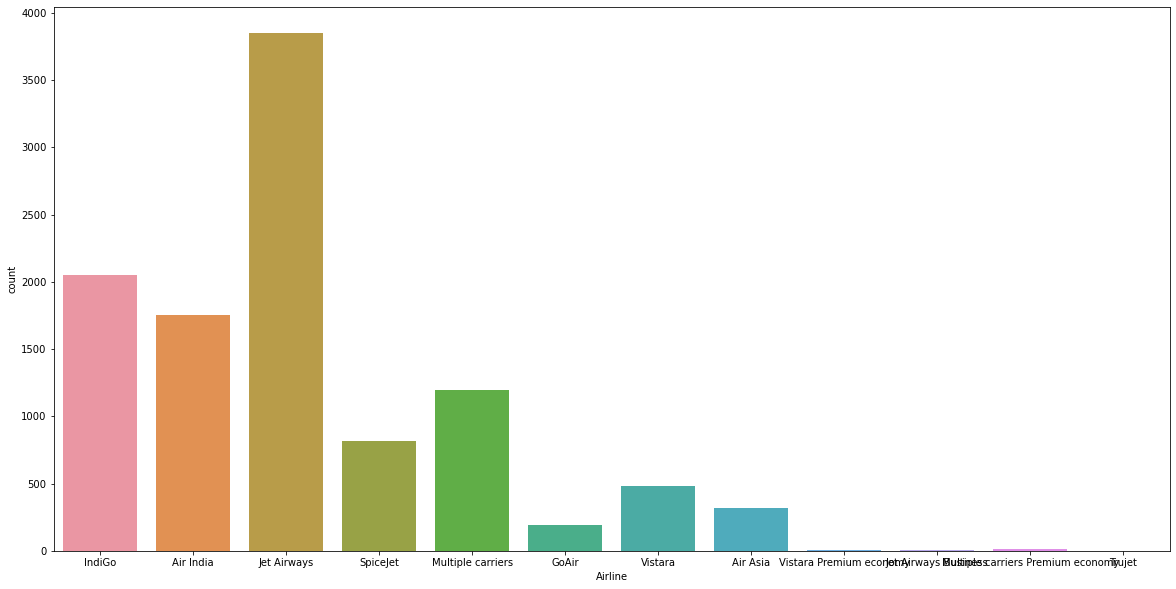

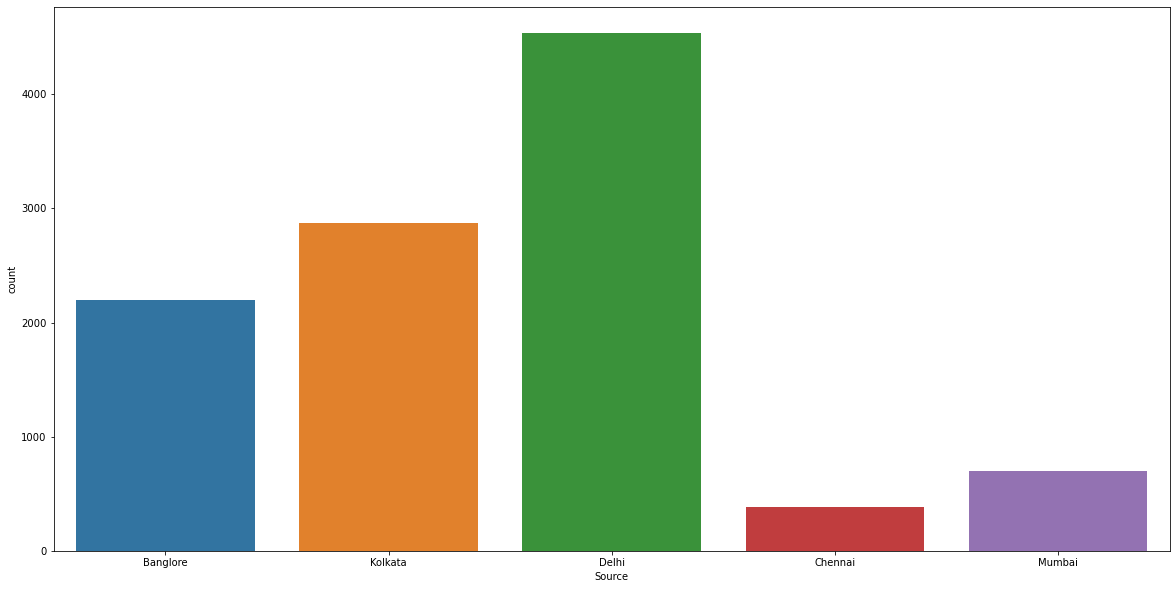

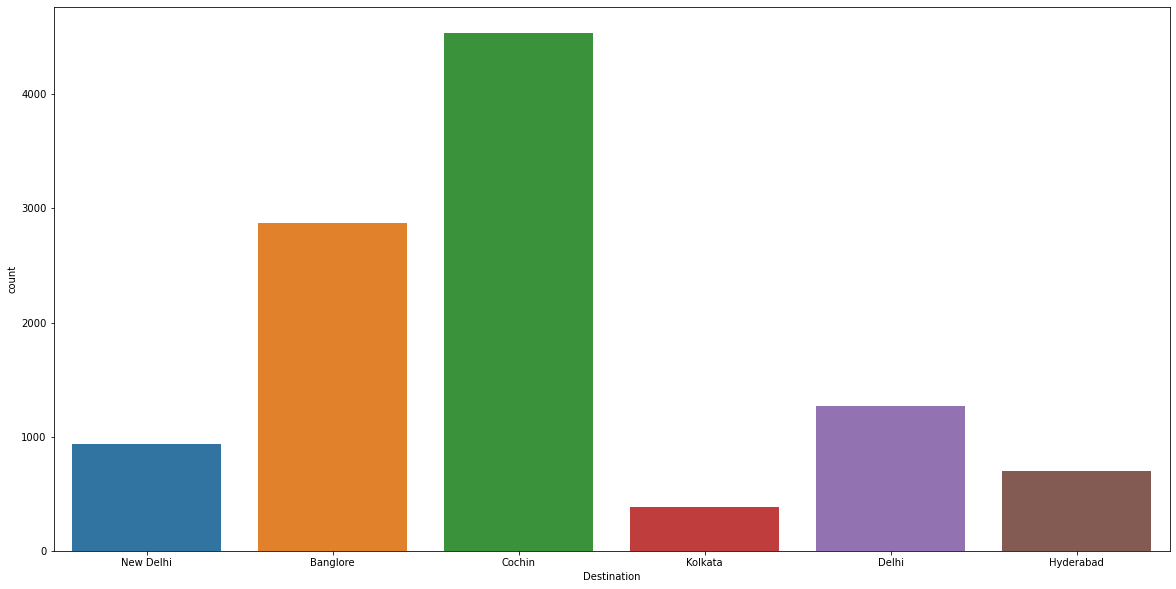

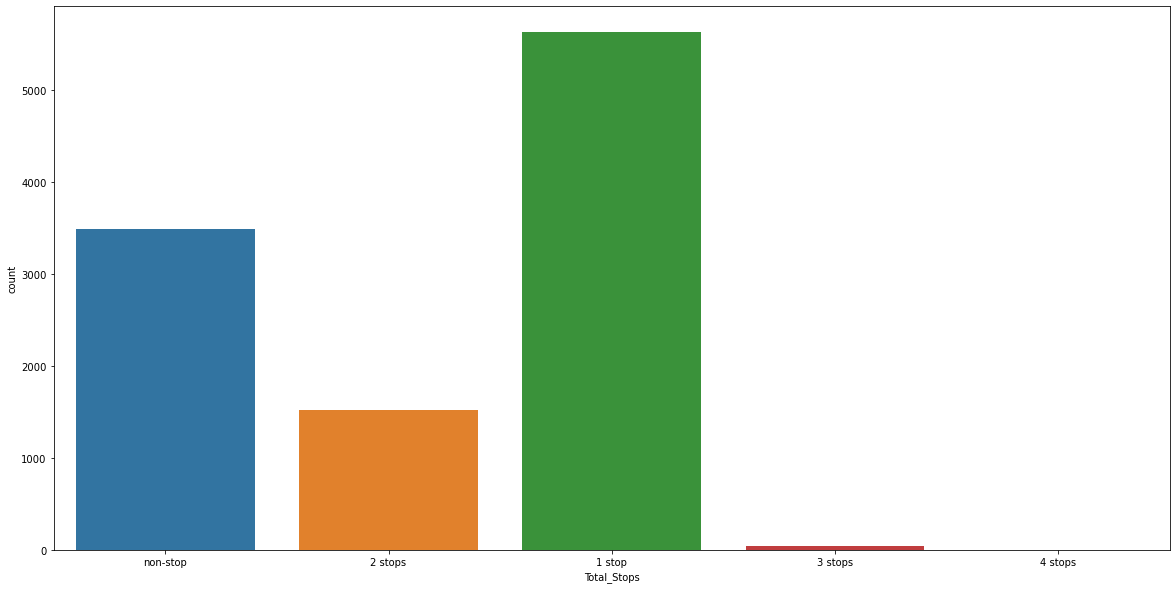

In [18]:
# ploting count(Bar) plot fo every categorical feature 

train_cols = ['Airline', 'Source', 'Destination', 'Total_Stops']
for i in train_cols:
    plt.figure(figsize=(20,10))
    sns.countplot(train[i])
    plt.show()
   

<AxesSubplot:xlabel='Airline', ylabel='count'>

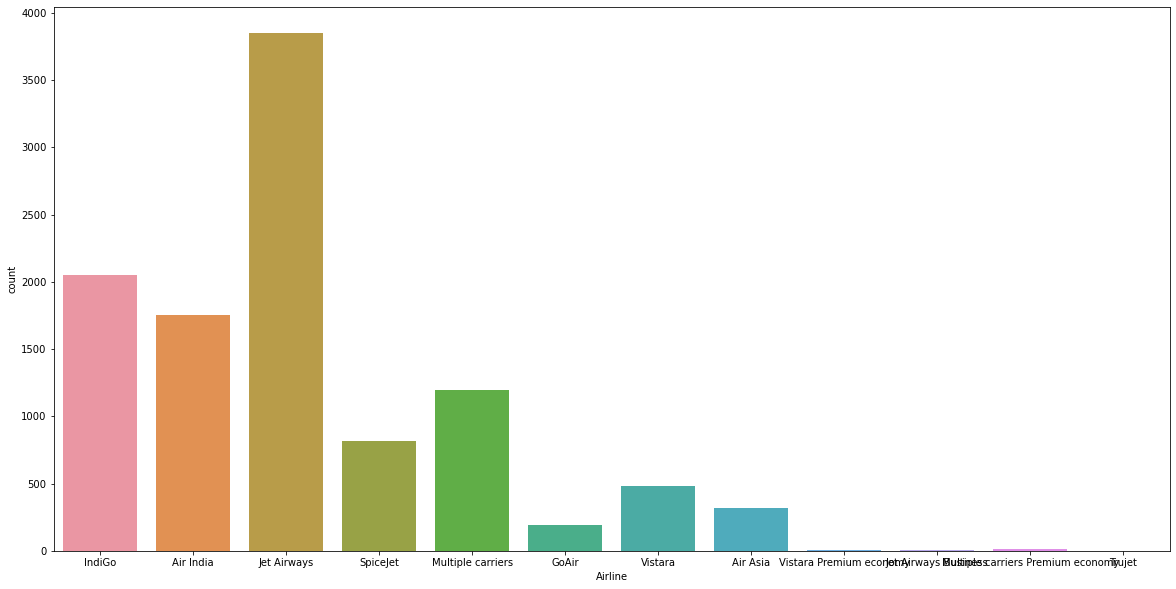

In [19]:
# Ploting Countplot for every required feature.


plt.figure(figsize=(20,10))
sns.countplot(x="Airline", data=train)

Here I can see that Jet Airways has biggest contribution in airline system, then Indigo followed by Air India, Multiple Carriers and all.


<AxesSubplot:xlabel='Source', ylabel='count'>

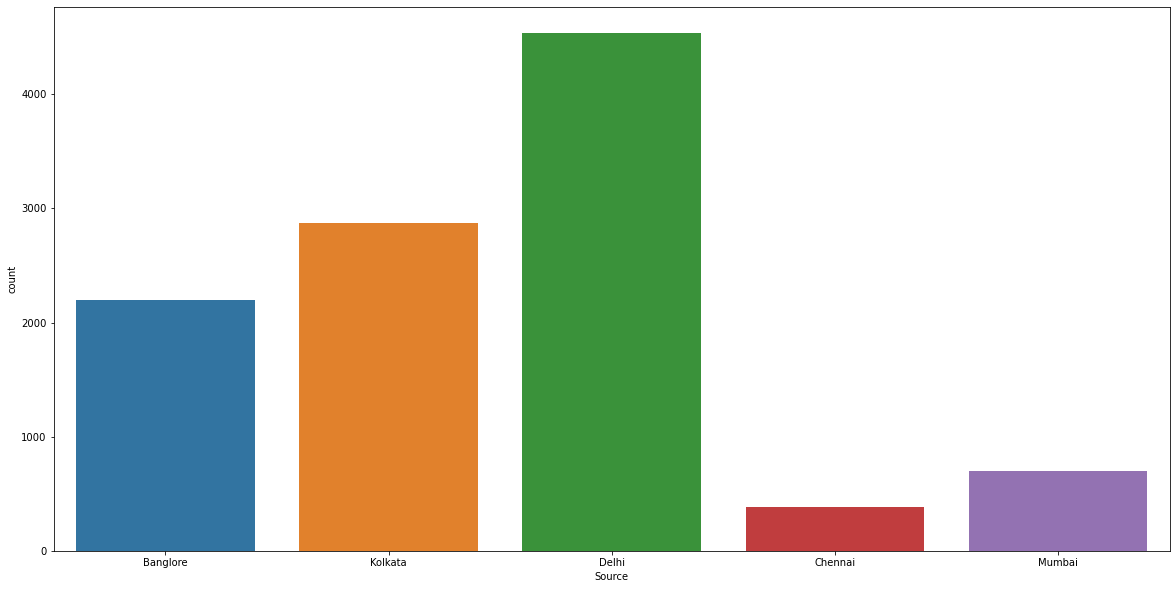

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x="Source", data=train)

From here I can say that Most of the flights starts from Delhi followed by kolkata, Bangalore, Mumbai and then Chennai.


<AxesSubplot:xlabel='Destination', ylabel='count'>

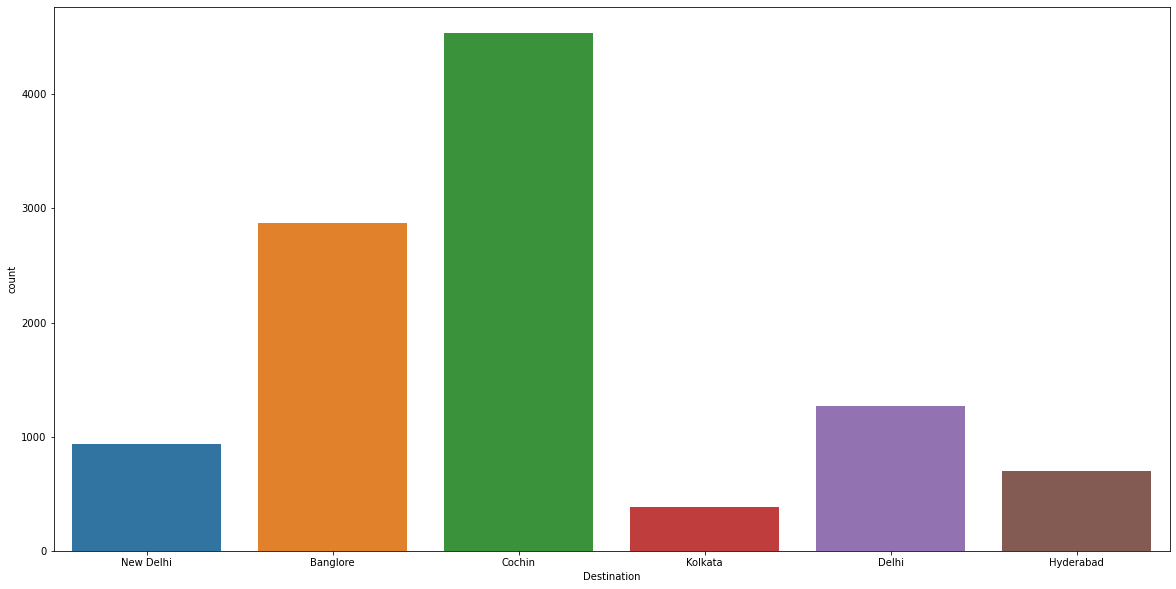

In [21]:

plt.figure(figsize=(20,10))
sns.countplot(x="Destination", data=train)

Most of the Flight's destination is Cochin followed by Bangalore, Delhi, New Delhi, Hydrabad and then Kolkata. 

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

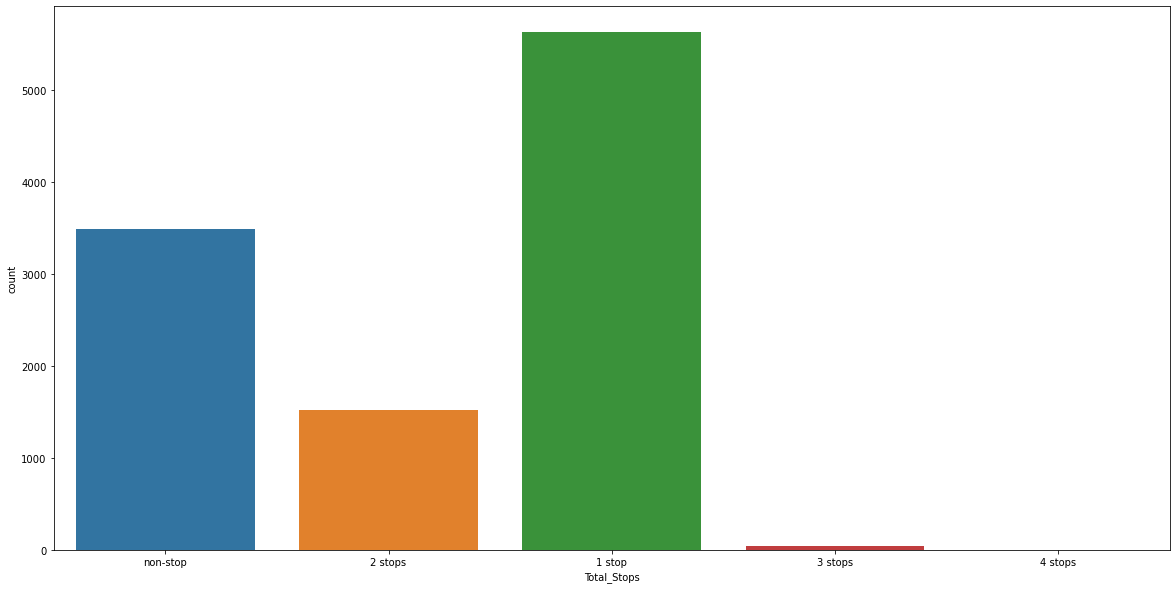

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x="Total_Stops", data=train)

Flight with only 1 stop is more than others. Non stops flights is also no lesser. 3 & 4 stops flight has very less contribution.

### 6. Missing values Treatment

In [23]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Only 2 missing values is there s we can drop these 2 entries, and it will not affect our accuracy much.

In [24]:
train.dropna(axis = 0, inplace=True)

In [25]:
train.shape

(10682, 11)

In [26]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Perfect!! There is no missing values in train data. I could perform this on test data also.

In [27]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No need to perform as it has no missing values..

### 7. Feature Engineering

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [28]:
# Extracting Day
train["Journey_day"] = pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.day
# Extracting Month
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month


# Since we have converted Date_of_Journey column into integers, Now we can drop as it as insignificant column
train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [29]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

# Extracting Minutes
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [30]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting Minutes
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [31]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [32]:
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [33]:
# Adding duration_hours and duration_mins list to train_data dataframe

train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

#drop insignificant columns
train.drop(["Duration"], axis = 1, inplace = True) 

In [34]:
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


### 8. Handling Categorical Data

In [35]:
train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

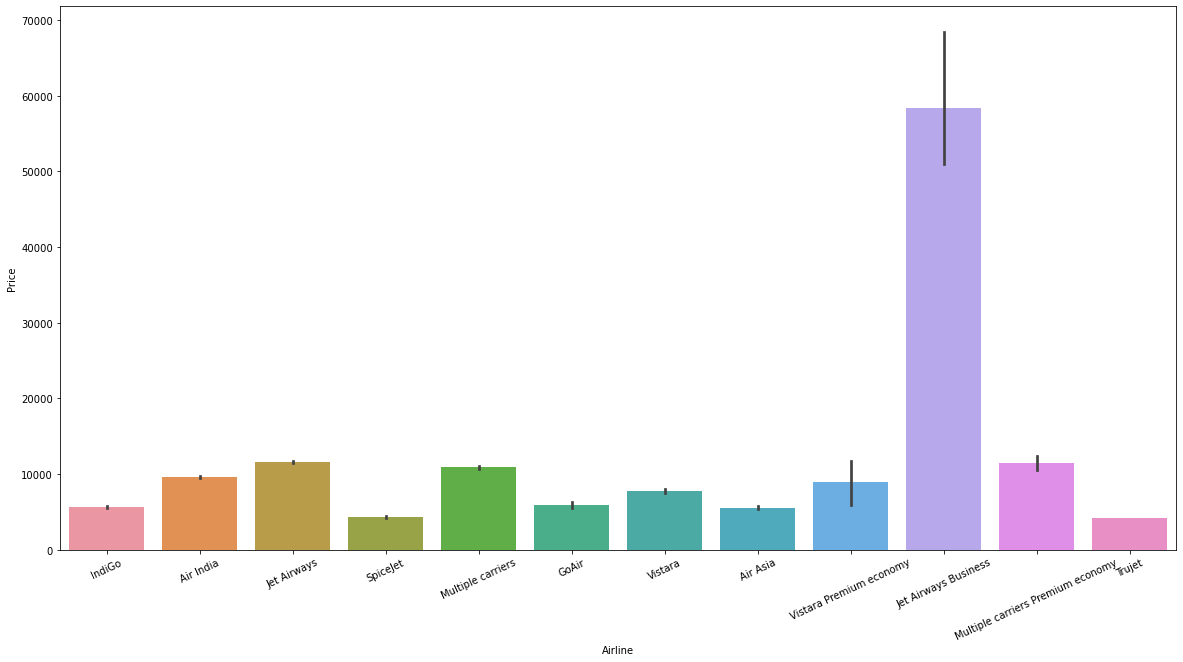

In [36]:
# creating the bar plot Airline Vs Price

plt.figure(figsize=(20,10))
sns.barplot("Airline","Price", data=train)
plt.xticks(rotation = 25)
plt.show()

It shows that Jet Airways Business is too much costly as compared to others

In [37]:
train[train["Airline"] == "Jet Airways Business"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,52229,1,3,5,45,10,45,5,0
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,5,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,5,45,12,25,6,40
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,No info,46490,3,3,20,5,4,25,8,20
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,No info,52285,6,3,20,5,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,9,45,14,25,4,40


In [38]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = pd.get_dummies(train["Airline"], drop_first= True)

In [39]:
train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

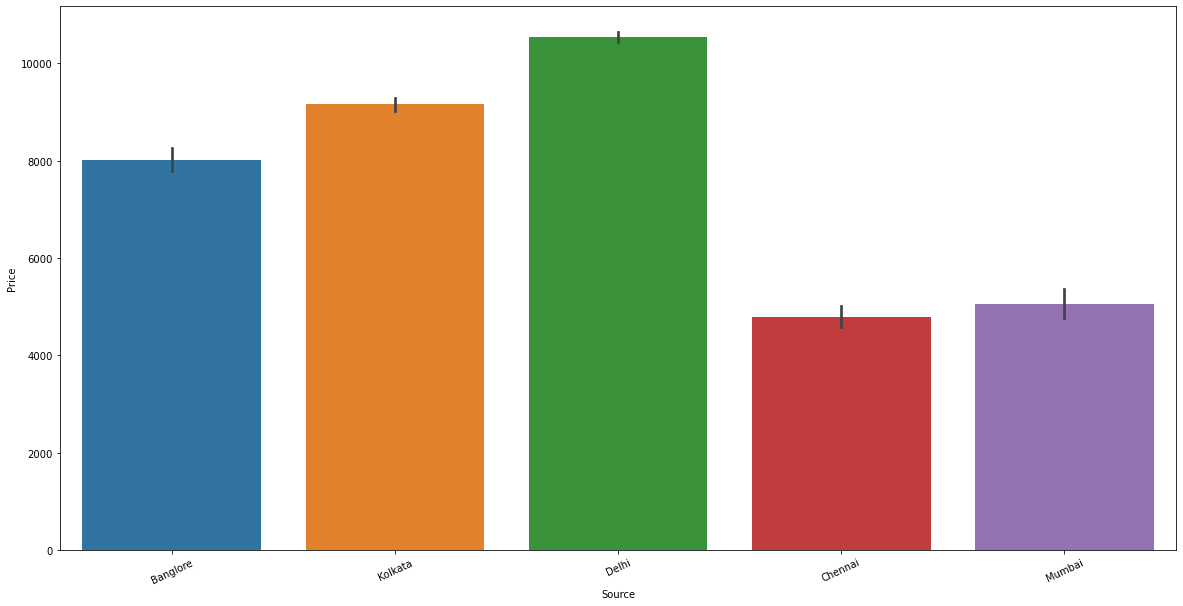

In [40]:
# creating the bar plot Source Vs Price

plt.figure(figsize=(20,10))
sns.barplot("Source","Price", data=train)
plt.xticks(rotation = 25)
plt.show()

It shows that journey starting from Delhi is costlier than starting from other source.

In [41]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = pd.get_dummies(train["Source"], drop_first= True)

In [42]:
# Checking for Destination

train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

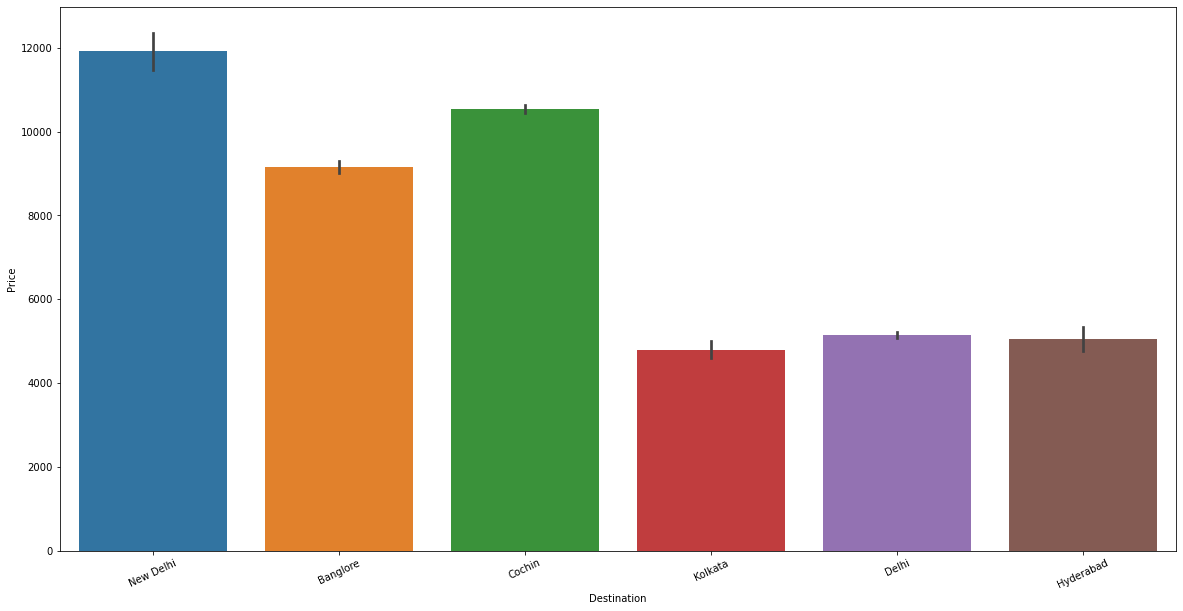

In [43]:
# creating the bar plot Source Vs Price

plt.figure(figsize=(20,10))
sns.barplot("Destination","Price", data=train)
plt.xticks(rotation = 25)
plt.show()

it shows that there are 2 group of Destination, 1st New Delhi, Bangalore, Cochin which are costlier and the other group is of Kolkata Delhi and Hyderabad which is less costlier.

In [44]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = pd.get_dummies(train["Destination"], drop_first = True)

In [45]:
# # Additional_Info contains no_info for most of its entries. and Route is of no use. So droping these 2 column

train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [46]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [48]:
# Now in train data only 3 feature is left which are categorical, and I did Dummyfication already. So I can remove it.

train.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [49]:
train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [50]:
# Concatenating those Dummyfied data into this train data.

train = pd.concat([train, Airline, Source, Destination], axis = 1)
train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [51]:
train.shape

(10682, 30)

In [52]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_day                        10682 non-null  int64
 3   Journey_month                      10682 non-null  int64
 4   Dep_hour                           10682 non-null  int64
 5   Dep_min                            10682 non-null  int64
 6   Arrival_hour                       10682 non-null  int64
 7   Arrival_min                        10682 non-null  int64
 8   Duration_hours                     10682 non-null  int64
 9   Duration_mins                      10682 non-null  int64
 10  Air India                          10682 non-null  uint8
 11  GoAir                              10682 non-null  uint8
 12  IndiGo            

Now I'm left with Numerical data only.

### 9. Working with Test dataset

In [54]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [55]:
test.shape

(2671, 10)

In [56]:
test.info() # It shows that all features are Object type of.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### 10. Missing value treatment 

In [57]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no Missing values, So no need to work here. 

### 11. EDA

In [58]:
# Similar as train data, In test data date is given in object format.
# I am changing it to minutes, hour, day and month columns.

In [59]:
# Date_of_Journey
test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [60]:
# Departure_Time
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [61]:
# Arrival_Time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [62]:
# Duration
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [63]:
# Adding Duration column to test set
test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins
test.drop(["Duration"], axis = 1, inplace = True)

### 12. Handling Categorical Data

In [64]:
# For Airlines
test["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [65]:
Airline = pd.get_dummies(test["Airline"], drop_first= True)

In [66]:
# For Source

print(test["Source"].value_counts())

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [67]:
Source = pd.get_dummies(test["Source"], drop_first= True)

In [68]:
# For Destination

test["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [69]:
Destination = pd.get_dummies(test["Destination"], drop_first = True)

In [70]:
# Dropping Route and Additional_Info column
test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [71]:
# Replacing Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [72]:
# Dropping Categorical column
test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [73]:
# Concatenating test data with Dummyfied columns
test = pd.concat([test, Airline, Source, Destination], axis = 1)

In [74]:
test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
test.shape

(2671, 28)

### 13. Feature Selection

In [76]:
# Independent Data
X= train.loc[:,train.columns!='Price']
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
# Dependent Data
y = train.loc[:, "Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

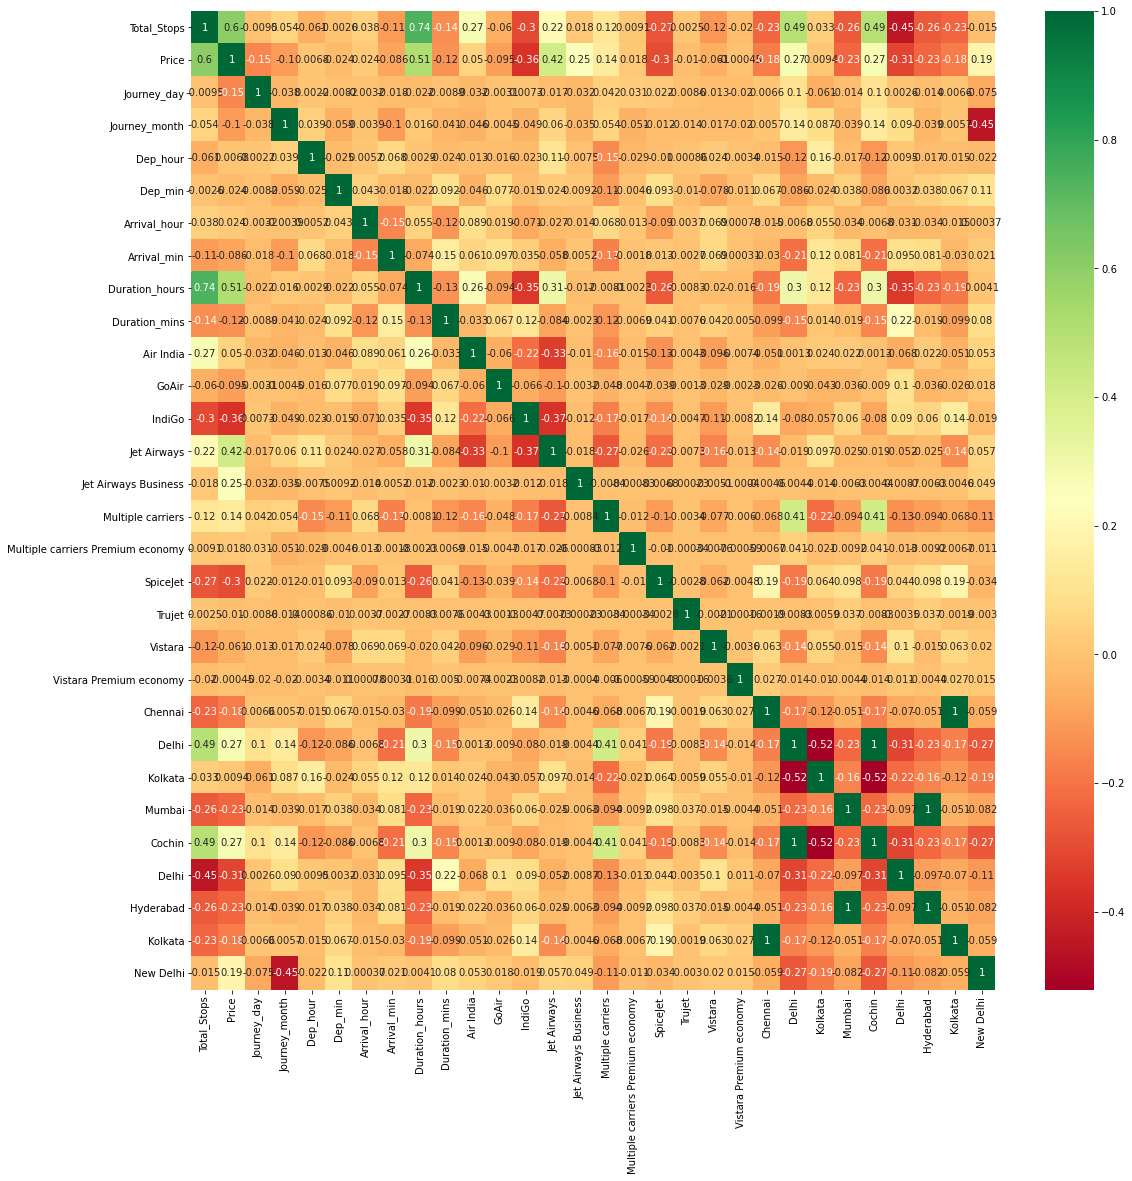

In [78]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [79]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [80]:
selection.feature_importances_

array([2.36123986e-01, 1.43560171e-01, 5.36527995e-02, 2.39200528e-02,
       2.13633151e-02, 2.75016051e-02, 1.89557065e-02, 1.20328641e-01,
       1.79170163e-02, 9.52723903e-03, 2.17730731e-03, 2.06611142e-02,
       1.30198355e-01, 6.72382167e-02, 1.69662788e-02, 8.52702412e-04,
       3.69675709e-03, 1.12224231e-04, 5.05678310e-03, 8.52561756e-05,
       5.99341087e-04, 9.07176093e-03, 3.09223152e-03, 6.85916173e-03,
       1.39946863e-02, 1.59516648e-02, 4.89992523e-03, 4.81797302e-04,
       2.51539048e-02])

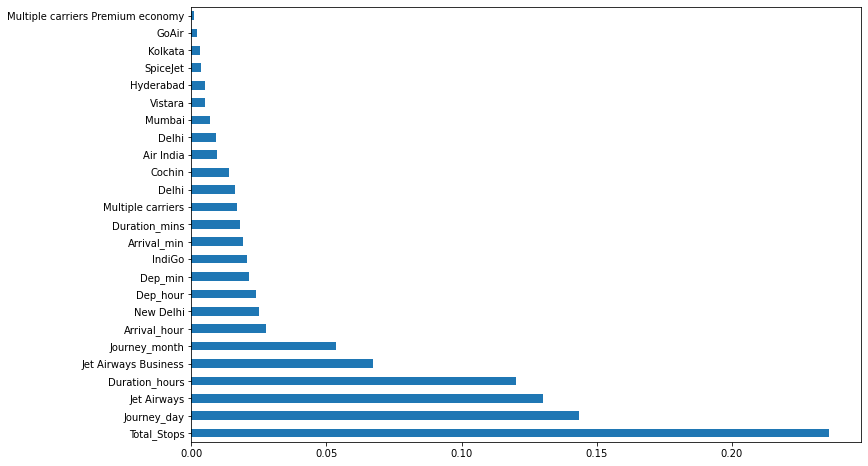

In [81]:
# plotting graph of feature importances for better visualization

plt.figure(figsize = (12,8))
f_imp = pd.Series(selection.feature_importances_, index=X.columns)
f_imp.nlargest(25).plot(kind='barh')
plt.show()

###  14. Fitting model using Random Forest


1.Split dataset into train and test set in order to prediction w.r.t X_test

2.If needed do scaling of data

Scaling is not done in Random forest

3.Import model

4.Fit the data

5.Predict w.r.t X_test

6.In regression check RSME Score
Plot graph

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
y_pred = reg_rf.predict(X_test) # 

In [85]:
reg_rf.score(X_train, y_train)

0.9530846273780553

In [86]:
reg_rf.score(X_test, y_test)

0.7947620682290364

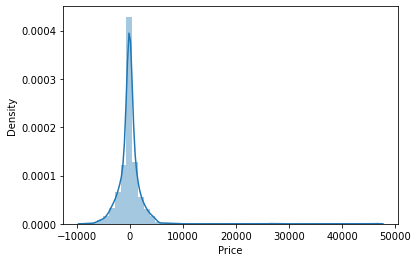

In [87]:
sns.distplot(y_test-y_pred)
plt.show()

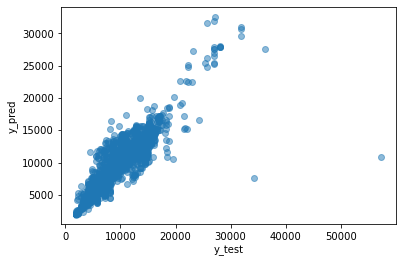

In [88]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [89]:
from sklearn import metrics

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1183.8650924624435
MSE: 4425351.844699992
RMSE: 2103.6520255736195
